# Intelligent Data Analysis - Assignment 3

# Rachit Aggarwal - M12506500

## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # to plot graphs
import pandas as pd
import numpy as np               # for numerical calculations
from sklearn.utils import shuffle   # to shuffle data
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier  # to import decision tree function
from sklearn.metrics import accuracy_score       # to import accuracy function
from sklearn.metrics import classification_report
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections
from sklearn import tree

## Importing BCP dataset

In [26]:
BCPdata = pd.read_csv('C:/Users/rachi/Desktop/wpbc.csv')
BCPdata.head()

,ID number,Outcome,Time,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


## FInding Null values

In [27]:
BCPdata.isnull().sum()

ID number              0
Outcome                0
Time                   0
radius 1               0
texture 1              0
perimeter 1            0
area 1                 0
smoothness 1           0
compactness 1          0
concavity 1            0
concave points 1       0
symmetry 1             0
fractal dimension 1    0
radius 2               0
texture 2              0
perimeter 2            0
area 2                 0
smoothness 2           0
compactness 2          0
concavity 2            0
concave points 2       0
symmetry 2             0
fractal dimension 2    0
radius 3               0
texture 3              0
perimeter 3            0
area 3                 0
smoothness 3           0
compactness 3          0
concavity 3            0
concave points 3       0
symmetry 3             0
fractal dimension 3    0
Tumor size             0
Lymph node status      4
dtype: int64

## Eliminating Null values and replacing them with Mean value

In [28]:
BCPdata['Lymph node status'].fillna(BCPdata['Lymph node status'].mean(), inplace=True)

## Answer 1

## Dropping recurrence time

In [29]:
BCPdata = BCPdata.drop(['Time'], axis=1)

## Shuffling Dataset

In [30]:
BCPdata = shuffle(BCPdata)

## Separating features and labels

In [31]:
X = BCPdata.loc[:,'radius 1':'Lymph node status'] # features
y = BCPdata.loc[:,'Outcome'] # target label
X.head()

,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,concave points 1,symmetry 1,fractal dimension 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
156,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,...,127.3,1084.0,0.1009,0.2920,0.2477,0.08737,0.4677,0.07623,2.5,0.0
35,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,...,113.1,907.2,0.1530,0.3724,0.3664,0.14920,0.3739,0.10270,2.6,1.0
15,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,136.8,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,3.0,1.0
5,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,...,107.3,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0
178,24.29,25.48,161.80,1715.0,0.09374,0.22840,0.27020,0.13690,0.2307,0.06308,...,184.8,2213.0,0.1247,0.3935,0.6118,0.20630,0.3983,0.07978,1.2,0.0


## Answer 1(a).

## Decision Tree classifier

## Parameters used:
### 1. Criterion: Gini index
### 2. Minimum Sample Leaf: 25
### 3. Splitter: Best
### 4. Minimum Sample Split: 2

In [32]:
decision_tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 25, splitter="best") 

## Evaluating Accuracy

In [33]:
scores = cross_val_score(decision_tree, X, y, cv=4)
print(scores)
print('\nAverage accuracy:,' + str(scores.mean()))

[0.76       0.76       0.76       0.77083333]

Average accuracy:,0.7627083333333334


## Fitting the model

In [34]:
fitting = decision_tree.fit(X,y)

## Predicting labels

In [35]:
predictions = fitting.predict(X)
predictions

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'R', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'R',
       'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'R', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'R',
       'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'R', 'N', 'R', 'R', 'N', 'N', 'N', 'N', 'R', 'N',
       'R', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N', 'N

## Plotting the decision tree learned

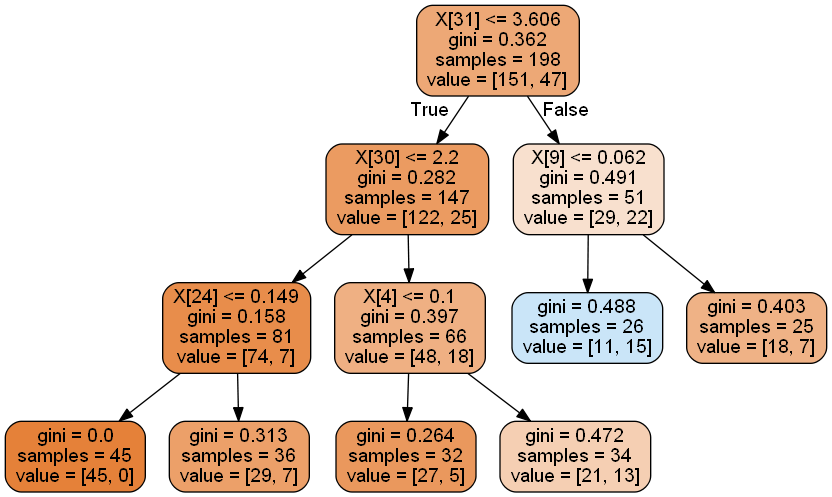

In [36]:
%matplotlib inline
dot_data = tree.export_graphviz(fitting,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
  
Image(graph.create_png())

## Evaluating the model

In [37]:
print(classification_report(y,predictions))

             precision    recall  f1-score   support

          N       0.81      0.93      0.87       151
          R       0.58      0.32      0.41        47

avg / total       0.76      0.78      0.76       198



## Answer 1(b).

### The total accuracy of the model is around 76%. The values of evaluation metrics are much better for class N than class R. Class N is more prominent in the given data. Paitents who are free of recurrence breast cancer are predicted more accurately classified, paitents for which reccurrence occured were classified poorly by the model.

## Answer 2

## Importing dataset

In [38]:
BCPdata = pd.read_csv('C:/Users/rachi/Desktop/wpbc.csv')
BCPdata.head()

,ID number,Outcome,Time,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


## Finding Null values

In [39]:
BCPdata.isnull().sum()

ID number              0
Outcome                0
Time                   0
radius 1               0
texture 1              0
perimeter 1            0
area 1                 0
smoothness 1           0
compactness 1          0
concavity 1            0
concave points 1       0
symmetry 1             0
fractal dimension 1    0
radius 2               0
texture 2              0
perimeter 2            0
area 2                 0
smoothness 2           0
compactness 2          0
concavity 2            0
concave points 2       0
symmetry 2             0
fractal dimension 2    0
radius 3               0
texture 3              0
perimeter 3            0
area 3                 0
smoothness 3           0
compactness 3          0
concavity 3            0
concave points 3       0
symmetry 3             0
fractal dimension 3    0
Tumor size             0
Lymph node status      4
dtype: int64

## Eliminating Null values and replacing them with Mean value

In [40]:
BCPdata['Lymph node status'].fillna(BCPdata['Lymph node status'].mean(), inplace=True)

## Dropping the class attribute

In [41]:
BCPdata = BCPdata.drop(['Outcome'], axis=1)
BCPdata.head()

,ID number,Time,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,concave points 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


## Separating features and target label

In [42]:
X = BCPdata.loc[:,'radius 1':'Lymph node status'] # features
y = BCPdata.loc[:,'Time'] # target label
X.head()

,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,concave points 1,symmetry 1,fractal dimension 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
0,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


## Answer 2(a).

## Dividing training and testing data

In [43]:
X_train, X_test, y_train, y_test = X[:132], X[132:], y[:132], y[132:]

## Average number of disease free years

In [44]:
avg_disease_free_time_train = y_train.mean()

In [45]:
avg_disease_free_time_train

58.833333333333336

## Calculating Mean Square Error

## MSE for training data

In [46]:
error_train = y_train - avg_disease_free_time_train
square_error_train = error_train * error_train
mean_square_error_train = square_error_train.mean()

In [47]:
mean_square_error_train

1183.9419191919192

## MSE for testing data

In [48]:
error_test = y_test - avg_disease_free_time_train
square_error_test = error_test * error_test
mean_square_error_test = square_error_test.mean()

In [49]:
mean_square_error_test

1616.4924242424247

## Answer 2(b).

## Calculating correlation using Pearson's Correlation Coefficient

In [50]:
def cal_correlation(X):
    global corr
    corr = []
    for i in X:
        feat = X_train[i]
        feat_mean = feat.mean()
        num = ((feat - feat_mean)*(y_train - avg_disease_free_time_train)).sum()
        denom = ((((feat - feat_mean)**2).sum()) * (((y_train - avg_disease_free_time_train)**2).sum()))**(1/2)
        correlation = num/denom
        corr.append(abs(correlation))
        print("Correlation between " + str(i) +" and disease-free years is: " + str(correlation))

In [51]:
features = X_train.keys()
cal_correlation(features)

Correlation between radius 1 and disease-free years is: -0.3646604075150667
Correlation between texture 1 and disease-free years is: -0.1302759028465298
Correlation between perimeter 1 and disease-free years is: -0.37330876008058334
Correlation between area 1  and disease-free years is: -0.36933189005221195
Correlation between smoothness 1 and disease-free years is: 0.13208365897275284
Correlation between compactness 1 and disease-free years is: -0.045900250285935716
Correlation between concavity 1 and disease-free years is: -0.16806454500699036
Correlation between concave points 1 and disease-free years is: -0.21425175736946708
Correlation between symmetry 1 and disease-free years is: 0.094061607123029
Correlation between fractal dimension 1 and disease-free years is: 0.2604458863493912
Correlation between radius 2 and disease-free years is: -0.2386906695227489
Correlation between texture 2 and disease-free years is: -0.16824732375961687
Correlation between perimeter 2 and disease-fre

## Tree Structure

In [52]:
class tree_structure(object):
    def __init__(self,name):
        self.name = name
        self.left = None
        self.right = None
        self.data = None

In [53]:
root = tree_structure('root')  # defining the root node

## Maximum Correlation value

In [54]:
max_correlation_index = corr.index(max(corr))
print(str(features[max_correlation_index]) + " has the maximum correlation with disease free year = " + str(max(corr)))

perimeter 1 has the maximum correlation with disease free year = 0.37330876008058334


## Median of most correlated attribute

In [55]:
median_most_corr_att = X_train['perimeter 1'].median()
print('Median value to split feature: ' + str(median_most_corr_att))

Median value to split feature: 110.05


## Splitting the dataset 

In [56]:
X_train_child1 = X_train[X_train['perimeter 1'] <= median_most_corr_att]
X_train_child2 = X_train[X_train['perimeter 1'] > median_most_corr_att]
y_train_child1 = y_train[X_train['perimeter 1'] <= median_most_corr_att]
y_train_child2 = y_train[X_train['perimeter 1'] > median_most_corr_att]

In [57]:
X_train_child1.shape   # Left Child

(66, 32)

In [58]:
X_train_child2.shape  # Right Child

(66, 32)

## Function to calculate MSE value

In [59]:
def cal_MSE(X):
    mean_value = X.mean()
    error = X - mean_value
    square_error = error * error
    mean_square_error = square_error.mean()
    return mean_square_error

## Calculating MSE values for child nodes

In [60]:
MSE_child1 = cal_MSE(y_train_child1)
MSE_child2 = cal_MSE(y_train_child2)
print("Split 1:\n MSE value at child 1: " + str(MSE_child1) +"\n MSE value at child 2: " + str(MSE_child2))

Split 1:
 MSE value at child 1: 1170.7017906336087
 MSE value at child 2: 933.3785583103765


In [61]:
root.data = [features[max_correlation_index], median_most_corr_att]
root_child1 = tree_structure('child1')
root.left = root_child1
root_child2 = tree_structure('child2')
root.right = root_child2

## Answer 2(c)

## Splitting Child 1 created after first split

## Calculating correlation values

In [62]:
def cal_correlation(X, y):
    X_train = X
    y_train = y
    feat_list = X_train.keys()
    global corr
    corr = []
    for i in feat_list:
        feat = X_train[i]
        feat_mean = feat.mean()
        num = ((feat - feat_mean)*(y_train - avg_disease_free_time_train)).sum()
        denom = ((((feat - feat_mean)**2).sum()) * (((y_train - avg_disease_free_time_train)**2).sum()))**(1/2)
        correlation = num/denom
        corr.append(abs(correlation))
        print("Correlation between " + str(i) +" and disease-free years is: " + str(correlation))

In [63]:
cal_correlation(X_train_child1, y_train_child1)

Correlation between radius 1 and disease-free years is: -0.04391754384800833
Correlation between texture 1 and disease-free years is: -0.009964355140576479
Correlation between perimeter 1 and disease-free years is: -0.04009232883486178
Correlation between area 1  and disease-free years is: -0.03454524037472215
Correlation between smoothness 1 and disease-free years is: 0.13495658928534854
Correlation between compactness 1 and disease-free years is: 0.07382744517911047
Correlation between concavity 1 and disease-free years is: 0.024120238520706643
Correlation between concave points 1 and disease-free years is: 0.043007748684999764
Correlation between symmetry 1 and disease-free years is: 0.06662367005394725
Correlation between fractal dimension 1 and disease-free years is: 0.12919952538306884
Correlation between radius 2 and disease-free years is: -0.05704339995753711
Correlation between texture 2 and disease-free years is: -0.030942358606852977
Correlation between perimeter 2 and disea

## Maximum correlation attribute

In [64]:
max_correlation_index = corr.index(max(corr))
print(str(features[max_correlation_index]) + " has the maximum correlation with disease free year = " + str(max(corr)))

Tumor size has the maximum correlation with disease free year = 0.17059478645885084


## Calculating median value

In [65]:
median_most_corr_att = X_train_child1['Tumor size'].median()
print('Median value to split feature: ' + str(median_most_corr_att))

Median value to split feature: 1.95


In [66]:
X_train_child3 = X_train_child1[X_train_child1['Tumor size'] <= median_most_corr_att]
X_train_child4 = X_train_child1[X_train_child1['Tumor size'] > median_most_corr_att]
y_train_child3 = y_train_child1[X_train_child1['Tumor size'] <= median_most_corr_att]
y_train_child4 = y_train_child1[X_train_child1['Tumor size'] > median_most_corr_att]

In [67]:
X_train_child3.shape

(33, 32)

In [68]:
X_train_child4.shape

(33, 32)

## Calculating MSE values for child nodes

In [69]:
MSE_child1 = cal_MSE(y_train_child3)
MSE_child2 = cal_MSE(y_train_child4)
print("Split 3:\n MSE value at child 3: " + str(MSE_child1) +"\n MSE value at child 4: " + str(MSE_child2))

Split 3:
 MSE value at child 3: 1192.1285583103763
 MSE value at child 4: 1144.955004591368


In [70]:
root_child1.data = [features[max_correlation_index], median_most_corr_att]
child1_child3 = tree_structure('child3')
root_child1.left = child1_child3
child1_child3.data = [y_train_child3.mean(), y_train_child3]    # saving the mean value in leaf node
child1_child4 = tree_structure('child4')
root_child1.right = child1_child4
child1_child4.data = [y_train_child4.mean(), y_train_child4]    # saving the mean value in leaf node

## Splitting Child 2 created after first split

## Calculating correlation values

In [71]:
cal_correlation(X_train_child2, y_train_child2)

Correlation between radius 1 and disease-free years is: -0.25183121394442204
Correlation between texture 1 and disease-free years is: -0.13491709867845525
Correlation between perimeter 1 and disease-free years is: -0.2814719965858862
Correlation between area 1  and disease-free years is: -0.2642618482795694
Correlation between smoothness 1 and disease-free years is: -0.022615506765812053
Correlation between compactness 1 and disease-free years is: -0.1274780400362097
Correlation between concavity 1 and disease-free years is: -0.1407801917497145
Correlation between concave points 1 and disease-free years is: -0.13880445858561422
Correlation between symmetry 1 and disease-free years is: 0.12375002881948315
Correlation between fractal dimension 1 and disease-free years is: 0.15959324651079781
Correlation between radius 2 and disease-free years is: -0.0841317575255581
Correlation between texture 2 and disease-free years is: -0.2427438299337118
Correlation between perimeter 2 and disease-fr

## Maximum correlation attribute

In [72]:
max_correlation_index = corr.index(max(corr))
print(str(features[max_correlation_index]) + " has the maximum correlation with disease free year = " + str(max(corr)))

perimeter 3 has the maximum correlation with disease free year = 0.2911114275695805


## Calculating median value

In [73]:
median_most_corr_att = X_train_child2['perimeter 3'].median()

In [74]:
X_train_child5 = X_train_child2[X_train_child2['perimeter 3'] <= median_most_corr_att]
X_train_child6 = X_train_child2[X_train_child2['perimeter 3'] > median_most_corr_att]
y_train_child5 = y_train_child2[X_train_child2['perimeter 3'] <= median_most_corr_att]
y_train_child6 = y_train_child2[X_train_child2['perimeter 3'] > median_most_corr_att]

## Calculating MSE values for child nodes

In [75]:
MSE_child1 = cal_MSE(y_train_child5)
MSE_child2 = cal_MSE(y_train_child6)
print("Split 4:\n MSE value at child 5: " + str(MSE_child1) +"\n MSE value at child 6: " + str(MSE_child2))

Split 4:
 MSE value at child 5: 845.262975778547
 MSE value at child 6: 815.3349609375


In [76]:
root_child2.data = [features[max_correlation_index], median_most_corr_att]
child2_child5 = tree_structure('child5')
root_child2.left = child2_child5
child2_child5.data = [y_train_child5.mean(), y_train_child5]    # saving the mean value in leaf node
child2_child6 = tree_structure('child6')
root_child2.right = child2_child6
child2_child6.data = [y_train_child6.mean(), y_train_child6]    # saving the mean value in leaf node

## Splitting Child 3 created after first split

## Calculating correlation values

In [77]:
cal_correlation(X_train_child3, y_train_child3)

Correlation between radius 1 and disease-free years is: 0.19492171749769227
Correlation between texture 1 and disease-free years is: 0.05511618761564744
Correlation between perimeter 1 and disease-free years is: 0.15931000253247715
Correlation between area 1  and disease-free years is: 0.21041269892919154
Correlation between smoothness 1 and disease-free years is: -0.0017363996374537849
Correlation between compactness 1 and disease-free years is: -0.14553314919612706
Correlation between concavity 1 and disease-free years is: -0.1347178131990292
Correlation between concave points 1 and disease-free years is: -0.03507095818000793
Correlation between symmetry 1 and disease-free years is: -0.13629117922354814
Correlation between fractal dimension 1 and disease-free years is: -0.15193099824191897
Correlation between radius 2 and disease-free years is: -0.04938126568308715
Correlation between texture 2 and disease-free years is: 0.1129133648763354
Correlation between perimeter 2 and disease-

## Maximum correlation attribute

In [78]:
max_correlation_index = corr.index(max(corr))
print(str(features[max_correlation_index]) + " has the maximum correlation with disease free year = " + str(max(corr)))

area 3 has the maximum correlation with disease free year = 0.21327020331368446


## Calculating median value

In [79]:
median_most_corr_att = X_train_child3['area 3'].median()

In [80]:
X_train_child7 = X_train_child3[X_train_child3['area 3'] <= median_most_corr_att]
X_train_child8 = X_train_child3[X_train_child3['area 3'] > median_most_corr_att]
y_train_child7 = y_train_child3[X_train_child3['area 3'] <= median_most_corr_att]
y_train_child8 = y_train_child3[X_train_child3['area 3'] > median_most_corr_att]

## Calculating MSE values of childs

In [81]:
MSE_child1 = cal_MSE(y_train_child7)
MSE_child2 = cal_MSE(y_train_child8)
print("Split 5:\n MSE value at child 7: " + str(MSE_child1) +"\n MSE value at child 8: " + str(MSE_child2))

Split 5:
 MSE value at child 7: 988.4636678200691
 MSE value at child 8: 1394.77734375


## Updating Tree Structure

In [82]:
child1_child3.data = [features[max_correlation_index], median_most_corr_att]
child3_child7 = tree_structure('child7')
child1_child3.left = child3_child7
child3_child7.data = [y_train_child7.mean(), y_train_child7]    # saving the mean value in leaf node
child3_child8 = tree_structure('child8')
child1_child3.right = child3_child8
child3_child8.data = [y_train_child8.mean(), y_train_child8]    # saving the mean value in leaf node

## Splitting Child 4 created after first split

In [83]:
cal_correlation(X_train_child4, y_train_child4)

Correlation between radius 1 and disease-free years is: -0.2211075296993024
Correlation between texture 1 and disease-free years is: -0.090550661782342
Correlation between perimeter 1 and disease-free years is: -0.19636795381031355
Correlation between area 1  and disease-free years is: -0.21266813250214422
Correlation between smoothness 1 and disease-free years is: 0.279813865909831
Correlation between compactness 1 and disease-free years is: 0.2667429191958104
Correlation between concavity 1 and disease-free years is: 0.20334889803892428
Correlation between concave points 1 and disease-free years is: 0.13971809313867292
Correlation between symmetry 1 and disease-free years is: 0.2644626458490611
Correlation between fractal dimension 1 and disease-free years is: 0.32049223611416283
Correlation between radius 2 and disease-free years is: -0.0626920970363064
Correlation between texture 2 and disease-free years is: -0.2017176310596359
Correlation between perimeter 2 and disease-free years

## Maximum correlation attribute

In [84]:
max_correlation_index = corr.index(max(corr))
print(str(features[max_correlation_index]) + " has the maximum correlation with disease free year = " + str(max(corr)))

symmetry 3 has the maximum correlation with disease free year = 0.3950700967707382


## Calculating median value

In [85]:
median_most_corr_att = X_train_child4['symmetry 3'].median()

In [86]:
X_train_child9 = X_train_child4[X_train_child4['symmetry 3'] <= median_most_corr_att]
X_train_child10 = X_train_child4[X_train_child4['symmetry 3'] > median_most_corr_att]
y_train_child9 = y_train_child4[X_train_child4['symmetry 3'] <= median_most_corr_att]
y_train_child10 = y_train_child4[X_train_child4['symmetry 3'] > median_most_corr_att]

## Calculating MSE values of childs

In [87]:
MSE_child1 = cal_MSE(y_train_child9)
MSE_child2 = cal_MSE(y_train_child10)
print("Split 6:\n MSE value at child 9: " + str(MSE_child1) +"\n MSE value at child 10: " + str(MSE_child2))

Split 6:
 MSE value at child 9: 980.8304498269897
 MSE value at child 10: 1280.6875


## Updating Tree Structure

In [88]:
child1_child4.data = [features[max_correlation_index], median_most_corr_att]
child3_child9 = tree_structure('child9')
child1_child4.left = child3_child9
child3_child9.data = [y_train_child9.mean(), y_train_child9]    # saving the mean value in leaf node
child3_child10 = tree_structure('child10')
child1_child4.right = child3_child10
child3_child10.data = [y_train_child10.mean(), y_train_child10]    # saving the mean value in leaf node

## The threshold value is chosen to be 930 as the stopping condition of the model. For smaller values the model may overfit the data as we can notice from the results the MSE value is increasing for some nodes and it will remain high untill further leaf nodes contains only one element which is prone to overfitting.

In [89]:
def treeorder(tree):
    if tree:
        print('\nNode name:' + str(tree.name))
        if(tree.left == None):
            print('Leaf Node')
            print('Population of leaf node:' + str(tree.data[1].size))
            print('Avg. value at leaf node:' + str(tree.data[0]))
        else:
            print('Attribute spliting the node:' + str(tree.data[0]))
            print('Mean value that splits the node:' + str(tree.data[1]))
        treeorder(tree.left)
        treeorder(tree.right)

## Structure of resulting tree

In [90]:
treeorder(root)


Node name:root
Attribute spliting the node:perimeter 1
Mean value that splits the node:110.05

Node name:child1
Attribute spliting the node:Tumor size
Mean value that splits the node:1.95

Node name:child3
Attribute spliting the node:area 3
Mean value that splits the node:928.8

Node name:child7
Leaf Node
Population of leaf node:17
Avg. value at leaf node:71.3529411764706

Node name:child8
Leaf Node
Population of leaf node:16
Avg. value at leaf node:66.1875

Node name:child4
Attribute spliting the node:symmetry 3
Mean value that splits the node:0.3485

Node name:child9
Leaf Node
Population of leaf node:17
Avg. value at leaf node:67.58823529411765

Node name:child10
Leaf Node
Population of leaf node:16
Avg. value at leaf node:76.25

Node name:child2
Attribute spliting the node:perimeter 3
Mean value that splits the node:157.6

Node name:child5
Leaf Node
Population of leaf node:34
Avg. value at leaf node:57.1764705882353

Node name:child6
Leaf Node
Population of leaf node:32
Avg. value 

## Leaf nodes details

In [91]:
def leafnodes(tree):
    if tree:
        if(tree.left == None):
            print('\nLeaf node name:' + str(tree.name))
            print('Population of leaf node is:' + str(tree.data[1].size))
            print('Avg. value at leaf node is:' + str(tree.data[0]))
        leafnodes(tree.left)
        leafnodes(tree.right)

In [92]:
leafnodes(root)


Leaf node name:child7
Population of leaf node is:17
Avg. value at leaf node is:71.3529411764706

Leaf node name:child8
Population of leaf node is:16
Avg. value at leaf node is:66.1875

Leaf node name:child9
Population of leaf node is:17
Avg. value at leaf node is:67.58823529411765

Leaf node name:child10
Population of leaf node is:16
Avg. value at leaf node is:76.25

Leaf node name:child5
Population of leaf node is:34
Avg. value at leaf node is:57.1764705882353

Leaf node name:child6
Population of leaf node is:32
Avg. value at leaf node is:36.90625


## Evaluating the regression tree

In [93]:
def predictions(X,rootnode):
    currentnode = rootnode
    for i in range(10):
        if(currentnode.left == None):
            #print(currentnode.data[0])
            return currentnode.data[0]
        elif(X[currentnode.data[0]] < currentnode.data[1]):
            currentnode = currentnode.left
        else:
            currentnode = currentnode.right

In [94]:
def tree_MSE_calc(X,y,rootnode):
    error = 0
    for i in range(len(X)):
        pred = predictions(X.iloc[i],rootnode)
        error = error + (y.iloc[i] - pred)**2
    return error/len(X)

## MSE on training data

In [95]:
MSETrain = tree_MSE_calc(X_train,y_train,root)
print('MSE on traing set: ' +str(MSETrain))

MSE on traing set: 978.0910456376321


In [96]:
MSETest = tree_MSE_calc(X_test,y_test,root)
print('MSE over testing set : ' +str(MSETest))

MSE over testing set : 1558.43982482699


## Answer 2(d).

### Performance of the model is better as compared to performance without using the model.
### Before
### MSE on Train: 1183.9419191919192
### MSE on Test: 1616.4924242424247
### Model
### MSE on Train: 978.0910456376321
### MSE on Test: 1558.43982482699
### It can be observer that the MSE values for the regression model built is comparatively less.

### The structre of the tree:
### Total Number of Nodes: 11
### Total Number of Leaf Nodes: 6
### Depth of the tree: 3

## MSE at each leaf node

In [97]:
def MSE(y,avg):
    MSEValue = ((y - avg)**2).mean()
    return MSEValue
def leafnode_MSE(tree):
    if tree:
        if(tree.left == None):
            print('\nLeaf node name:' + str(tree.name))
            MSEAtLeaf = MSE(tree.data[1], tree.data[0])
            print('MSE at leaf node is:' + str(MSEAtLeaf))
        leafnode_MSE(tree.left)
        leafnode_MSE(tree.right)

In [98]:
leafnode_MSE(root)


Leaf node name:child7
MSE at leaf node is:988.4636678200691

Leaf node name:child8
MSE at leaf node is:1394.77734375

Leaf node name:child9
MSE at leaf node is:980.8304498269897

Leaf node name:child10
MSE at leaf node is:1280.6875

Leaf node name:child5
MSE at leaf node is:845.262975778547

Leaf node name:child6
MSE at leaf node is:815.3349609375


## The best path of the model is from root node to child6 as the MSE value at child 6 is the least = 815.3349609375, and it is constantly decreasing from the root node.

## Worst path of the model would be from root node to child8 as the MSE value at child8 is the maximum

### For splitting following attributes were used in order:
### 1. Split root node: Perimeter 1
### 2. Split child1: Tumor Size
### 3. Split child2: Perimeter 3
### 4. Split child3: Area 3
### 5. Split child4: Symmetry 3

### The regression tree built and the decision tree from 1(a). both have similar structure. Each of them have 11 nodes, 6 leaf nodes. The differences is that the minimum samples per leaf nodes in decision tree is 25 whereas in regression tree it is 16. Also the attributes used to split nodes are different for both the models

## Answer 3

## Importing Dataset for White Wine Quality

In [305]:
WWQdata = pd.read_csv('C:/Users/rachi/Desktop/WWQ.csv')
WWQdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Separating features and label

In [306]:
X = WWQdata.loc[:,'fixed acidity':'alcohol'] # features
y = WWQdata.loc[:,'quality'] # target label
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [307]:
features = X.keys()
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## Dividng data into training and testing sets

In [308]:
X_train, X_test, y_train, y_test = X[:3266], X[3266:], y[:3266], y[3266:]

## Average quality measure of wine

In [309]:
avg_quality_train = y_train.mean()
avg_quality_train

5.850581751377832

## Calculating Mean Square Error

## MSE for training data

In [310]:
error_train = y_train - avg_quality_train
square_error_train = error_train * error_train
mean_square_error_train = square_error_train.mean()
mean_square_error_train

0.8343796370705479

## MSE for testing data

In [311]:
error_test = y_test - avg_quality_train
square_error_test = error_test * error_test
mean_square_error_test = square_error_test.mean()
mean_square_error_test

0.6860071765649042

## Regression Tree

In [312]:
class tree_structure(object):
    def __init__(self,name):
        self.name = name
        self.left = None
        self.right = None
        self.data = None

In [313]:
tree = tree_structure('rootnode')  # defining the root node

## Splitting the maximum correlated attribute

In [314]:
def node_split(X_train, y_train):
    cal_correlation(X_train, y_train)
    max_correlation = corr
    max_correlation_index = max_correlation.index(max(max_correlation))
    print("\n" + str(features[max_correlation_index]) + " has the maximum correlation with disease free year = " + str(max(max_correlation)))
    max_correlation_att = features[max_correlation_index]
    median_most_corr_att = X_train[max_correlation_att].median()
    print("\n Median value used for split: " + str(median_most_corr_att))
    X_train_child1 = X_train[X_train[max_correlation_att] <= median_most_corr_att]
    X_train_child2 = X_train[X_train[max_correlation_att] > median_most_corr_att]
    y_train_child1 = y_train[X_train[max_correlation_att] <= median_most_corr_att]
    y_train_child2 = y_train[X_train[max_correlation_att] > median_most_corr_att]
    MSE_child1 = cal_MSE(y_train_child1)
    MSE_child2 = cal_MSE(y_train_child2)
    print("Split:\n MSE value at left child: " + str(MSE_child1) +"\n MSE value at right child: " + str(MSE_child2))
    return X_train_child1,X_train_child2, y_train_child1, y_train_child2, median_most_corr_att, max_correlation_att

In [315]:
child1_X_train, child2_X_train, child1_y_train, child2_y_train, median_value_split, max_correlation_att = node_split(X_train, y_train)

Correlation between fixed acidity and disease-free years is: -0.0018204878288098955
Correlation between volatile acidity and disease-free years is: -0.003404564083342887
Correlation between citric acid and disease-free years is: -5.703476414645546e-05
Correlation between residual sugar and disease-free years is: -0.0019332379019645926
Correlation between chlorides and disease-free years is: -0.0035144266527587253
Correlation between free sulfur dioxide and disease-free years is: 0.00042858014769571007
Correlation between total sulfur dioxide and disease-free years is: -0.002699663657288541
Correlation between density and disease-free years is: -0.005326000873896224
Correlation between pH and disease-free years is: 0.0023282001101219336
Correlation between sulphates and disease-free years is: 0.0012001407736442799
Correlation between alcohol and disease-free years is: 0.007638762934055219

alcohol has the maximum correlation with disease free year = 0.007638762934055219

 Median value u

## Updating the tree

In [316]:
tree.data = [max_correlation_att, median_value_split]

In [317]:
child1 = tree_structure('child1')
tree.left = child1
child1.data = [child1_y_train.mean(), child1_y_train]
child2 = tree_structure('child2')
tree.right = child2

## Taking the Threshold value as 0.70. Child1 will not be splitted as its MSE value is < 0.70

## Splitting child 2 with most correlated attribute

In [318]:
child3_X_train, child4_X_train, child3_y_train, child4_y_train, median_value_split, max_correlation_att = node_split(child2_X_train, child2_y_train)

Correlation between fixed acidity and disease-free years is: -0.00342402300845018
Correlation between volatile acidity and disease-free years is: -0.001098707679321442
Correlation between citric acid and disease-free years is: -0.0004354279030061746
Correlation between residual sugar and disease-free years is: 0.0001521960086301738
Correlation between chlorides and disease-free years is: -0.002652549872843986
Correlation between free sulfur dioxide and disease-free years is: 0.0029386196156985438
Correlation between total sulfur dioxide and disease-free years is: -0.0005175101895538468
Correlation between density and disease-free years is: -0.003968988670811414
Correlation between pH and disease-free years is: 0.0023007909892711876
Correlation between sulphates and disease-free years is: 0.0013354425664486972
Correlation between alcohol and disease-free years is: 0.006164464766419385

alcohol has the maximum correlation with disease free year = 0.006164464766419385

 Median value used 

In [319]:
child2.data = [max_correlation_att, median_value_split]
child3 = tree_structure('child3')
child2.left = child3
child4 = tree_structure('child4')
child2.right = child4

## Splitting child 3 with most correlated attribute

In [320]:
child5_X_train, child6_X_train, child5_y_train, child6_y_train, median_value_split, max_correlation_att = node_split(child3_X_train, child3_y_train)

Correlation between fixed acidity and disease-free years is: -0.002982733807318036
Correlation between volatile acidity and disease-free years is: -0.005412570011408333
Correlation between citric acid and disease-free years is: -0.0003141214172855591
Correlation between residual sugar and disease-free years is: 0.00033303641546438527
Correlation between chlorides and disease-free years is: -0.0004402612746740858
Correlation between free sulfur dioxide and disease-free years is: 0.00196174656561497
Correlation between total sulfur dioxide and disease-free years is: -0.00101381313476099
Correlation between density and disease-free years is: -0.0019855295086641848
Correlation between pH and disease-free years is: 0.0028316138737994536
Correlation between sulphates and disease-free years is: 0.0013259817333749722
Correlation between alcohol and disease-free years is: 0.0034002968517479262

volatile acidity has the maximum correlation with disease free year = 0.005412570011408333

 Median v

In [321]:
child3.data = [max_correlation_att, median_value_split]
child5 = tree_structure('child5')
child3.left = child5
child5.data = [child5_y_train.mean(), child5_y_train]
child6 = tree_structure('child6')
child3.right = child6

## MSE of child5 < threshold value, no splitting required

## Splitting child 4 with most correlated attribute

In [322]:
child7_X_train, child8_X_train, child7_y_train, child8_y_train, median_value_split, max_correlation_att = node_split(child4_X_train, child4_y_train)

Correlation between fixed acidity and disease-free years is: -0.003048545117126431
Correlation between volatile acidity and disease-free years is: 0.00146581274222481
Correlation between citric acid and disease-free years is: -0.0012126233820582454
Correlation between residual sugar and disease-free years is: 0.0006766456967955467
Correlation between chlorides and disease-free years is: -0.0024640504482020837
Correlation between free sulfur dioxide and disease-free years is: 0.00431744493225706
Correlation between total sulfur dioxide and disease-free years is: 0.0018370545352411555
Correlation between density and disease-free years is: -0.0017852650741580968
Correlation between pH and disease-free years is: 0.002850827124186709
Correlation between sulphates and disease-free years is: 0.0018225336311031611
Correlation between alcohol and disease-free years is: 0.004291543429920085

free sulfur dioxide has the maximum correlation with disease free year = 0.00431744493225706

 Median val

In [323]:
child4.data = [max_correlation_att, median_value_split]
child7 = tree_structure('child7')
child4.left = child7
child8 = tree_structure('child8')
child4.right = child8
child8.data = [child8_y_train.mean(), child8_y_train]

## MSE of child8 < threshold value, no splitting required

## Splitting child 6 with most correlated attribute

In [324]:
child9_X_train, child10_X_train, child9_y_train, child10_y_train, median_value_split, max_correlation_att = node_split(child6_X_train, child6_y_train)

Correlation between fixed acidity and disease-free years is: -0.0032393642830191613
Correlation between volatile acidity and disease-free years is: -0.005380620323246324
Correlation between citric acid and disease-free years is: -0.001201493900243985
Correlation between residual sugar and disease-free years is: 0.0005154755656088908
Correlation between chlorides and disease-free years is: -0.0009522081909605675
Correlation between free sulfur dioxide and disease-free years is: 0.002051268231748571
Correlation between total sulfur dioxide and disease-free years is: -0.001177140835309058
Correlation between density and disease-free years is: -0.002405882305535073
Correlation between pH and disease-free years is: 0.0038741360467223263
Correlation between sulphates and disease-free years is: 0.0010190362897814942
Correlation between alcohol and disease-free years is: 0.003840241541093177

volatile acidity has the maximum correlation with disease free year = 0.005380620323246324

 Median va

In [325]:
child6.data = [max_correlation_att, median_value_split]
child9 = tree_structure('child9')
child6.left = child9
child9.data = [child9_y_train.mean(), child9_y_train]
child10 = tree_structure('child10')
child6.right = child10
child10.data = [child10_y_train.mean(), child10_y_train]

## Splitting child 7 with most correlated attribute

In [326]:
child11_X_train, child12_X_train, child11_y_train, child12_y_train, median_value_split, max_correlation_att = node_split(child7_X_train, child7_y_train)

Correlation between fixed acidity and disease-free years is: -0.0030312682630186305
Correlation between volatile acidity and disease-free years is: 0.0005005835778545466
Correlation between citric acid and disease-free years is: -0.0011119297901105575
Correlation between residual sugar and disease-free years is: 0.00022985457232548004
Correlation between chlorides and disease-free years is: -0.002590511831014671
Correlation between free sulfur dioxide and disease-free years is: 0.0072070265477533636
Correlation between total sulfur dioxide and disease-free years is: 0.0027885986603713563
Correlation between density and disease-free years is: -0.0016181724731311874
Correlation between pH and disease-free years is: 0.0030849919411288004
Correlation between sulphates and disease-free years is: 0.0025508927081964007
Correlation between alcohol and disease-free years is: 0.003707374301130754

free sulfur dioxide has the maximum correlation with disease free year = 0.0072070265477533636

 Me

In [327]:
child7.data = [max_correlation_att, median_value_split]
child7.left = child11
child11.data = [child11_y_train.mean(), child11_y_train]
child12 = tree_structure('child12')
child7.right = child12
child12.data = [child12_y_train.mean(), child12_y_train]

## MSE of child12 < threshold value, no splitting required

## The MSE throshold value = 0.70 is used as stopping condition for the model. For values than these might lead to overfitting the data. For smaller values of threshold the MSE value will become 0 if the model containg only 1 element in leaf nodes, which is basically overfitting the model

In [328]:
def treeorder(tree):
    if tree:
        print('\nNode name:' + str(tree.name))
        if(tree.left == None):
            print('Leaf Node')
            print('Population of leaf node:' + str(tree.data[1].size))
            print('Avg. value at leaf node:' + str(tree.data[0]))
        else:
            print('Attribute spliting the node:' + str(tree.data[0]))
            print('Mean value that splits the node:' + str(tree.data[1]))
        treeorder(tree.left)
        treeorder(tree.right)

In [331]:
def leafnodes(tree):
    if tree:
        if(tree.left == None):
            print('\nLeaf node name: ' + str(tree.name))
            print('Population of leaf node is: ' + str(tree.data[1].size))
            print('Avg. value for quality at leaf node is: ' + str(tree.data[0]))
        leafnodes(tree.left)
        leafnodes(tree.right)

## Answer 3(a).

## Structure of the tree constructed

In [330]:
treeorder(tree)


Node name:rootnode
Attribute spliting the node:alcohol
Mean value that splits the node:10.1

Node name:child1
Leaf Node
Population of leaf node:1636
Avg. value at leaf node:5.51161369193154

Node name:child2
Attribute spliting the node:alcohol
Mean value that splits the node:11.149999999999999

Node name:child3
Attribute spliting the node:volatile acidity
Mean value that splits the node:0.24

Node name:child5
Leaf Node
Population of leaf node:441
Avg. value at leaf node:6.129251700680272

Node name:child6
Attribute spliting the node:volatile acidity
Mean value that splits the node:0.29

Node name:child9
Leaf Node
Population of leaf node:188
Avg. value at leaf node:5.877659574468085

Node name:child10
Leaf Node
Population of leaf node:186
Avg. value at leaf node:5.521505376344086

Node name:child4
Attribute spliting the node:free sulfur dioxide
Mean value that splits the node:30.0

Node name:child7
Attribute spliting the node:free sulfur dioxide
Mean value that splits the node:21.0

No

## Leaf nodes info

In [332]:
leafnodes(tree)


Leaf node name: child1
Population of leaf node is: 1636
Avg. value for quality at leaf node is: 5.51161369193154

Leaf node name: child5
Population of leaf node is: 441
Avg. value for quality at leaf node is: 6.129251700680272

Leaf node name: child9
Population of leaf node is: 188
Avg. value for quality at leaf node is: 5.877659574468085

Leaf node name: child10
Population of leaf node is: 186
Avg. value for quality at leaf node is: 5.521505376344086

Leaf node name: child11
Population of leaf node is: 214
Avg. value for quality at leaf node is: 6.042056074766355

Leaf node name: child12
Population of leaf node is: 206
Avg. value for quality at leaf node is: 6.597087378640777

Leaf node name: child8
Population of leaf node is: 395
Avg. value for quality at leaf node is: 6.592405063291139


## Making predictions and calculating MSE values

## MSE values  for training data

In [335]:
MSE_train = tree_MSE_calc(X_train, y_train, tree)
print('MSE over training set: ' +str(MSE_train))

MSE over training set: 0.6570298682495789


## MSE values  for test data

In [336]:
MSE_test = tree_MSE_calc(X_test, y_test, tree)
print('MSE over testing set: ' +str(MSE_test))

MSE over testing set: 0.5536694548548751


## Answer 3(b).

## MSE at each leaf node

In [337]:
leafnode_MSE(tree)


Leaf node name:child1
MSE at leaf node is:0.561601063480023

Leaf node name:child5
MSE at leaf node is:0.6522282382340706

Leaf node name:child9
MSE at leaf node is:0.8201392032593922

Leaf node name:child10
MSE at leaf node is:0.7764192392184084

Leaf node name:child11
MSE at leaf node is:1.0776705389116956

Leaf node name:child12
MSE at leaf node is:0.6192148176076921

Leaf node name:child8
MSE at leaf node is:0.7072840890882878


### The best path in the regression tree model will be from root node to child1 as the MSE value is the lowest = 0.561601063480023
### The worst path in the model is from root node to child11 as the MSE value is very high at this node = 1.0776705389116956

## Answer 4

## Loading the Red Wine Quality dataset

In [338]:
RWQdata = pd.read_csv('C:/Users/rachi/Desktop/RWQ.csv')
RWQdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Separating features and labels

In [339]:
X = RWQdata.loc[:,'fixed acidity':'alcohol']
y = RWQdata.loc[:,'quality']
X.shape

(1599, 11)

## Computing the MSE value of the red wine data using regression tree learned for white wine data

In [340]:
RWQ_MSE = tree_MSE_calc(X,y,tree)
print('MSE of Red Wine Data: ' + str(RWQ_MSE))

MSE of red wines: 0.5516244960024362


## Comparing the MSE values of both datasets

In [342]:
print('MSE of White Wine Data: ' +str(MSE_test))
print('MSE of Red Red Data: ' + str(RWQ_MSE))

MSE of White Wine Data: 0.5536694548548751
MSE of Red Red Data: 0.5516244960024362


### The performance of the model for Red Wine Data is very much comparable to the performance on White Wine Data. The MSE values are very similar for both the datasets.
### It can be concluded that, since same features were used for both the datasets, it is clear that the samples in both datasets are highly relatable and similar. The Regression Tree model trained on White Wine Data can be used to predict values for the Red Wine Data much efficiently.